In [229]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn import linear_model
from sklearn.datasets import make_classification

import seaborn as sns
sns.set(style="white")

In [82]:
df=pd.read_csv(r'C:\Users\chat2\OneDrive\Desktop\Data Mining\ass-4\HousingPrice (1).csv')

In [158]:
df.head()
df.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'EXTA', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolAr

In [102]:
df.describe()
df.columns.sort_values()
cor=df['GrLivArea'].corr(df['SalePrice'])
#a/df['ExterQual'].count()
cor

0.7086244776126522

In [20]:
my_tab = pd.crosstab(index=df["ExterQual"],  # Make a crosstab
                              columns="count")      # Name the count column
a=df['ExterQual'].value_counts()
my_tab['Percentage']=a*100/df['ExterQual'].count()
my_tab

col_0,count,Percentage
ExterQual,,
Ex,52,3.561644
Fa,14,0.958904
Gd,488,33.424658
TA,906,62.054795


In [78]:
df['EXTA']=df['ExterQual'].loc[(df['ExterQual'] == "Ex")] = 1
df['EXTA'].value_counts()

1    1460
Name: EXTA, dtype: int64

In [83]:
#df['EXTA'] = np.where(df['ExterQual']  == "Ex", 1, df['ExterQual'])
df['EXTA'] = np.where(df['ExterQual']  != "Ex", 0, df['ExterQual'])

In [86]:
df['EXTA'] = np.where(df['EXTA']  == "Ex", 1, df['EXTA'] )

In [239]:

df['EXTA'].value_counts()
y_4=df['EXTA']
x_4=df['SalePrice']
x_4.shape
y_4.shape
df['EXTA']
x_4=df['SalePrice']
y_4=y_4.astype('int')
print(x_4.shape)
print(y_4.shape)
df['EXTA']=df['EXTA'].astype('int')

(1460,)
(1460,)


In [155]:
classification1=LogisticRegression()
classification1.fit(x_4.values.reshape(-1,1),y_4.values.reshape(-1,1))
y_pred=classification1.predict([[200000]])
y_pred

C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0])

In [220]:
print(classification1.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(classification1.intercept_)  #Prints value for intercept/b0 
np.exp(classification1.coef_)
print(x_4.values.reshape(-1,1).shape)
print(y_4.values.reshape(-1,1).shape)

[[-1.43414267e-05]]
[-1.91221121e-10]
(1460, 1)
(1460, 1)


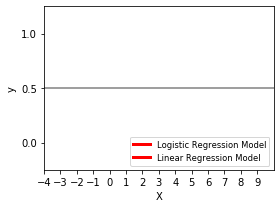

In [228]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(x_4, y_4, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)
loss = expit(X_test * classification1.coef_ + classification1.intercept_)
plt.plot(X_test.reshape(1,-1), loss, color='red', linewidth=3)
ols = linear_model.LinearRegression()
ols.fit(x_4.values.reshape(-1,1), y_4.values.reshape(-1,1))
plt.plot(X_test.reshape(1,-1), ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()

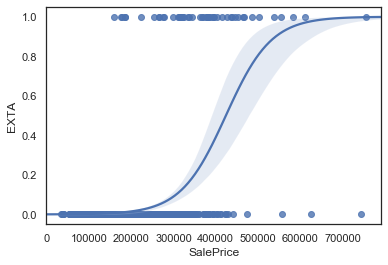

In [240]:
import seaborn as sns
sns.regplot(x='SalePrice', y='EXTA', data=df, logistic=True)

In [176]:
import statsmodels.api as sm
logit_model=sm.Logit(y_4.values,x_4.values)
result=logit_model.fit()
print(result.summary())
np.exp(result.params)


Optimization terminated successfully.
         Current function value: 0.095278
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1460
Model:                          Logit   Df Residuals:                     1458
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.3803
Time:                        01:41:29   Log-Likelihood:                -139.11
converged:                       True   LL-Null:                       -224.48
Covariance Type:            nonrobust   LLR p-value:                 5.079e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.883e-05   1.79e-06     10.540      0.000    1.53e-05    2.23e-05
x2            -0.0040      0.

array([1.00001883, 0.99601277])

In [166]:
x_4_2=df[['SalePrice','YearBuilt']]
x_4_2.shape
y_4.shape

(1460,)

In [167]:
classification2=LogisticRegression()
classification2.fit(x_4_2.values,y_4.values.reshape(-1,1))


C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\chat2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
print(classification2.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(classification2.intercept_)  #Prints value for intercept/b0 


[[ 1.87084927e-05 -3.97588369e-03]]
[-2.07081578e-06]


In [169]:
import statsmodels.api as sm
logit_model1=sm.Logit(y_4.values,x_4_2.values)
result1=logit_model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.095278
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1460
Model:                          Logit   Df Residuals:                     1458
Method:                           MLE   Df Model:                            1
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.3803
Time:                        01:30:14   Log-Likelihood:                -139.11
converged:                       True   LL-Null:                       -224.48
Covariance Type:            nonrobust   LLR p-value:                 5.079e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1.883e-05   1.79e-06     10.540      0.000    1.53e-05    2.23e-05
x2            -0.0040      0.